In [1]:
# import library
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin,sqrt

# Importing re package for using regular expressions
import re

# import for visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set_theme(color_codes=True)


# import for the geographic features
from uszipcode import SearchEngine, SimpleZipcode, ComprehensiveZipcode
import descartes
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point, Polygon

# for modelling
from sklearn.tree import DecisionTreeClassifier                # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split           # Import train_test_split function
from sklearn import metrics                                    #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_text
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings("ignore")


C:\Users\Q\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Data Exploratory & Data Cleaning 

In [2]:
df = pd.read_csv('CPsales.csv')

In [3]:
df.shape

(1709, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1709 non-null   int64  
 1   Submission Date   1709 non-null   object 
 2   Zip Code          1709 non-null   object 
 3   utm_source        1709 non-null   object 
 4   utm_medium        1709 non-null   object 
 5   utm_campaign      1709 non-null   object 
 6   LeadID            1709 non-null   int64  
 7   Customer Code     672 non-null    object 
 8   Mismatch          1709 non-null   int64  
 9   Sales Order Date  672 non-null    object 
 10  Sales Total       672 non-null    float64
dtypes: float64(1), int64(3), object(7)
memory usage: 147.0+ KB


 Data Cleaning:
 1. calculate the NA value
 2. Drop the unsupportive columns 
 3. Filled in NA Value with integer 0
 4. Discuss Drop the Duplicates based on the Unique value(LeadID)
 5. Zip-Code Extension uniformize 
 6.

In [5]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

Unnamed: 0           0.00
Submission Date      0.00
Zip Code             0.00
utm_source           0.00
utm_medium           0.00
utm_campaign         0.00
LeadID               0.00
Customer Code       60.68
Mismatch             0.00
Sales Order Date    60.68
Sales Total         60.68
dtype: float64

In [6]:
#Drop the unrelavant columns and filled N/A with 0 
df = df.drop(columns=["Unnamed: 0",'Mismatch'],axis=1)
df= df.fillna(0)

In [7]:
#find the duplicates:
df[df.duplicated(subset='LeadID',keep = False)].sort_values(by='LeadID')


,Submission Date,Zip Code,utm_source,utm_medium,utm_campaign,LeadID,Customer Code,Sales Order Date,Sales Total
646,12/14/2021 9:06,77065,website,org,homefortheholidays,16,0,0,0.00
647,12/14/2021 9:07,77065,website,org,homefortheholidays,16,0,0,0.00
821,12/2/2021 17:56,77379,sms,text,homefortheholidays,32,0,0,0.00
822,12/2/2021 18:06,77379,sms,text,homefortheholidays,32,0,0,0.00
673,12/16/2021 18:49,77083-5774,website,org,homefortheholidays,72,0,0,0.00
...,...,...,...,...,...,...,...,...,...
233,11/30/2021 15:07,77566,sms,text,homefortheholidays,1096,FREEM518Z2,12/20/2021,-270.61
440,12/1/2021 22:50,77469,website,org,homefortheholidays,1102,0,0,0.00
439,12/1/2021 22:47,77469,website,org,homefortheholidays,1102,0,0,0.00
1123,12/29/2021 17:17,77511,website,org,homefortheholidays,1132,0,0,0.00


In [8]:
# Drop Duplicates and sort by LeadID to make sure there's singlar LeadID in the Dataframe
NonDuplicates_df=df.drop_duplicates(subset=['LeadID'], keep ='first')
NonDuplicates_df.sort_values('LeadID')

,Submission Date,Zip Code,utm_source,utm_medium,utm_campaign,LeadID,Customer Code,Sales Order Date,Sales Total
436,12/1/2021 22:11,77831,website,org,homefortheholidays,0,0,0,0.0
65,11/30/2021 11:40,77502,sms,text,homefortheholidays,1,0,0,0.0
1534,12/8/2021 19:51,2050,website,org,homefortheholidays,2,0,0,0.0
915,12/21/2021 12:39,77076,website,org,homefortheholidays,3,0,0,0.0
1107,12/28/2021 16:08,77365,website,org,homefortheholidays,4,0,0,0.0
...,...,...,...,...,...,...,...,...,...
1264,12/4/2021 19:42,77465,website,org,homefortheholidays,1128,0,0,0.0
1036,12/25/2021 8:01,77422,google,mybusiness,homefortheholidays,1129,0,0,0.0
208,11/30/2021 14:32,77081,sms,text,homefortheholidays,1130,0,0,0.0
463,12/10/2021 13:34,70047,website,org,homefortheholidays,1131,0,0,0.0


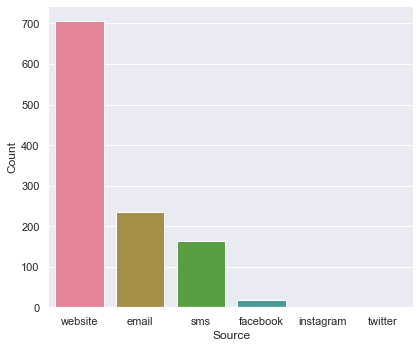

In [9]:
#this is for the catplot showing the counts for each utm source 
g = sns.catplot(data=NonDuplicates_df,x="utm_source",saturation=.7,kind="count", order = ["website", "email", "sms", "facebook", "instagram", "twitter"], ci=None, aspect=1.2, palette= "husl")
g.set_axis_labels("Source", "Count")
g.set_titles("{col_name} {col_var}")
g.despine(left=True)
#.set(ylim=(0, 800)) 
sns.set_style("white")


# Zipcode nondigital character cleaning by Quby

In [10]:
# CombineDf['Zip Code']= CombineDf['Zip Code'].str.replace(r'\W',"")
NonDuplicates_df['Zip Code']=NonDuplicates_df['Zip Code'].str.replace(r'\W',"")

In [11]:
#Created a method to clean the zipcode that has more than 5 digits
def ZipcodeValidate(S):
    if S[:1]=="0":
        S=S[1:6]
    if len(S)>= 5 or S.isalpha() or S.isdigit(): 
            S= S[:5]
    return S  

        

In [12]:
# CombineDf['Zip Code']=CombineDf['Zip Code'].apply(ZipcodeValidate)
NonDuplicates_df['Zip Code']=NonDuplicates_df['Zip Code'].apply(ZipcodeValidate)

In [13]:
# CombineDf['Zip Code'].unique()
NonDuplicates_df['Zip Code'].unique()

array(['77302', '77484', '77433', '77035', '77498', '77021', '77571',
       '77346', '77339', '77497', '77901', '77318', '77511', '77059',
       '77049', '77354', '77304', '77535', '77381', '77573', '77099',
       '77065', '77064', '77034', '77459', '77045', '77708', '77477',
       '77389', '79556', '77407', '77396', '77575', '77379', '77520',
       '77079', '77441', '77033', '77014', '77073', '77469', '77013',
       '77091', '77578', '77449', '77377', '77022', '77503', '77502',
       '78504', '7004', '77489', '77327', '77284', '77545', '77583',
       '77047', '77024', '77915', '77070', '77069', '77028', '77080',
       '77447', '77486', '77512', '76245', '77365', '77056', '77386',
       '77506', '77083', '77584', '77301', '77651', '77650', '77375',
       '77026', '76119', '76053', '77338', '75090', '77040', '78642',
       '53214', '77429', '77076', '77833', '77063', '77077', '77547',
       '76050', '77591', '77566', '77586', '74126', '77018', '77530',
       '77007', '7747

In [14]:
NonDuplicates_df.loc[NonDuplicates_df['Zip Code'].str.len ()<5, 'Zip Code'] ="0"
NonDuplicates_df.loc[NonDuplicates_df['Zip Code'].str.contains(pat = '[Aa-zZ]'), 'Zip Code'] ="0"

In [15]:
NonDuplicates_df['Zip Code'].unique()

array(['77302', '77484', '77433', '77035', '77498', '77021', '77571',
       '77346', '77339', '77497', '77901', '77318', '77511', '77059',
       '77049', '77354', '77304', '77535', '77381', '77573', '77099',
       '77065', '77064', '77034', '77459', '77045', '77708', '77477',
       '77389', '79556', '77407', '77396', '77575', '77379', '77520',
       '77079', '77441', '77033', '77014', '77073', '77469', '77013',
       '77091', '77578', '77449', '77377', '77022', '77503', '77502',
       '78504', '0', '77489', '77327', '77284', '77545', '77583', '77047',
       '77024', '77915', '77070', '77069', '77028', '77080', '77447',
       '77486', '77512', '76245', '77365', '77056', '77386', '77506',
       '77083', '77584', '77301', '77651', '77650', '77375', '77026',
       '76119', '76053', '77338', '75090', '77040', '78642', '53214',
       '77429', '77076', '77833', '77063', '77077', '77547', '76050',
       '77591', '77566', '77586', '74126', '77018', '77530', '77007',
       '77479',

In [16]:
#convert from string to integer so that it can be searched in the Uszipcode API
NonDuplicates_df['Zip Code']=NonDuplicates_df['Zip Code'].astype(int)

# After delete the Duplicates,we discovered the relationships among coupon submition date time, in certain zipcode with purchase and without purchase.

In [17]:
# Q's Agggregate purchased sales total by [LeadID]
ModifiedDf= NonDuplicates_df.groupby(['Submission Date','Zip Code','utm_source','utm_campaign','LeadID','Sales Order Date'],as_index=False).agg({'Sales Total':sum})
ModifiedDf = ModifiedDf.reset_index()

#Jacob's sales data aggregation 
JfModifiedDf=NonDuplicates_df.groupby('LeadID', as_index = 'False').agg({'Submission Date':'last','Zip Code': 'last', 'utm_source':'last',
                                              'utm_campaign':'last','Customer Code':'last', 'Sales Order Date':'last', 'Sales Total':'sum'})





# Nonpurchased customer :

In [18]:
#Coustomer who has zero purchased 
NonPurchasedCustomer=ModifiedDf.loc[ModifiedDf['Sales Total']==0] 
NonPurchasedCustomer.sort_values('LeadID')
NonPurchasedCustomer

,index,Submission Date,Zip Code,utm_source,utm_campaign,LeadID,Sales Order Date,Sales Total
0,0,1/1/2022 10:50,77302,website,homefortheholidays,51,0,0.0
1,1,1/1/2022 12:16,77484,website,homefortheholidays,928,0,0.0
2,2,1/1/2022 13:58,77433,website,homefortheholidays,643,0,0.0
3,3,1/1/2022 17:46,77035,website,homefortheholidays,794,0,0.0
4,4,1/1/2022 18:33,77498,website,homefortheholidays,707,0,0.0
...,...,...,...,...,...,...,...,...
1127,1127,12/9/2021 21:37,77833,website,homefortheholidays,1115,0,0.0
1128,1128,12/9/2021 21:53,77357,website,homefortheholidays,1041,0,0.0
1130,1130,12/9/2021 23:22,77316,website,homefortheholidays,668,0,0.0
1131,1131,12/9/2021 8:04,77406,website,homefortheholidays,417,0,0.0


# purchased customer :

In [19]:
PurchasedCustomer=ModifiedDf.loc[(ModifiedDf['Sales Total'] !=0)].sort_values('Sales Total')
PurchasedCustomer

,index,Submission Date,Zip Code,utm_source,utm_campaign,LeadID,Sales Order Date,Sales Total
846,846,12/3/2021 17:05,77373,website,homefortheholidays,120,12/4/2021,-1140.93
800,800,12/27/2021 18:18,77450,website,homefortheholidays,738,12/27/2021,-323.67
160,160,11/30/2021 15:07,77566,sms,homefortheholidays,1096,12/20/2021,-270.61
185,185,11/30/2021 22:35,77044,website,homefortheholidays,202,12/15/2021,433.00
375,375,12/10/2021 7:53,77979,website,homefortheholidays,344,1/10/2022,524.24
...,...,...,...,...,...,...,...,...
54,54,11/30/2021 11:40,77433,sms,homefortheholidays,429,12/4/2021,13422.94
101,101,11/30/2021 12:10,77650,sms,homefortheholidays,204,12/17/2021,14007.48
754,754,12/23/2021 19:30,77407,website,homefortheholidays,53,12/26/2021,14395.07
1077,1077,12/9/2021 11:31,77584,email,homefortheholidays,65,12/21/2021,18560.49


In [20]:
#Using different varibale JsPurhcase to assign purchased customers from the clean data set.
JsPurchase=JfModifiedDf.loc[(JfModifiedDf['Sales Total'] !=0)]

# Jacob's Graph: Datetime Difference

In [21]:

#Changing data types for date columns for the time difference model
JsPurchase['Submission Date'] = JsPurchase['Submission Date'].astype('datetime64[ns]')
JsPurchase['Sales Order Date'] = JsPurchase['Sales Order Date'].astype('datetime64[ns]')
#Find the difference between the submission date and the sales order date
JsPurchase['diff in days'] = JsPurchase['Sales Order Date'] - JsPurchase['Submission Date']
#converts to in terms of days
JsPurchase['diff in days'] = JsPurchase['diff in days'] / np.timedelta64(1,'D')
JsPurchase['diff in days'] = abs(JsPurchase['diff in days'])
#Fill na with 0
JsPurchase['diff in days'] = JsPurchase['diff in days'].fillna(0)
JsPurchase['diff in days'] = JsPurchase['diff in days'].astype(int)

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

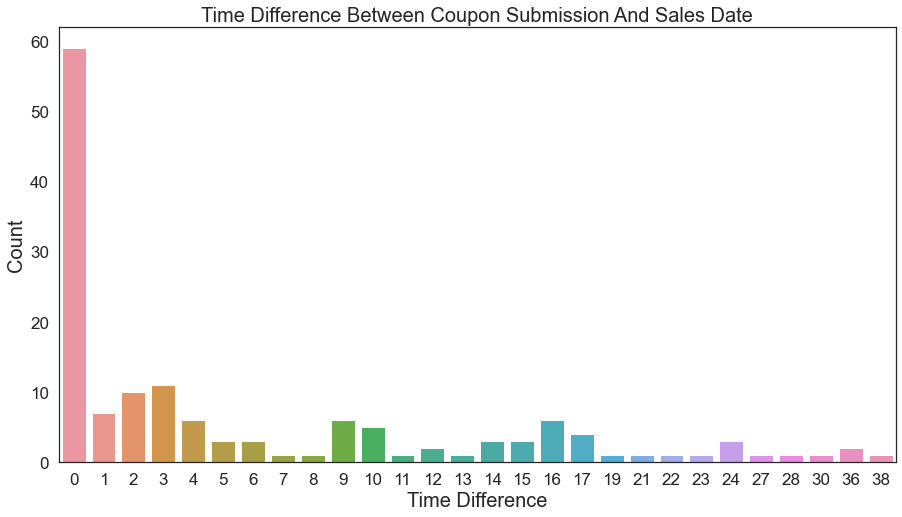

In [22]:
#Time Difference Model
plt.figure(figsize = (15,8))
plt.title("Time Difference Between Coupon Submission And Sales Date", fontsize = 20)
sns.countplot(x = 'diff in days',data = JsPurchase)
sns.set(rc={'figure.figsize':(8,7)})
plt.xlabel('Time Difference', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(size = 17)
plt.yticks(size = 17)

## Total Sales by one identified user(LeadlD)

# Marketing performance based on the conversion rate

In [23]:
# Conversion Rate: people who made the purchase/total Prosepect Customers(Lead ID)

Totalprosepect_customers = NonPurchasedCustomer['LeadID'].nunique()+PurchasedCustomer['LeadID'].nunique()
Subscriber_customers = PurchasedCustomer['LeadID'].nunique()
conversion_rate=Subscriber_customers/Totalprosepect_customers
print(round(conversion_rate*100, 2), "%")

12.8 %


# Geolocation from the purchased customers:

# Jacob's Geomap & Kaitlyn's top 10 zipcode sales total graph

In [24]:
# Read Greater Houston Area Shape File
#Read data as geodataframe
# # Shapefile for geomap
USShapefile = r'C:\Users\Q\Desktop\PIC Math\Galleria Funiture\COH_ZIPCODE.shp'
# HoustonZipData = gpd.read_file(USShapefile)
HoustonZipData = gpd.read_file("COH_ZIPCODE.shp")

In [25]:
#Variable Declarations for the Greater Houston Region Model
Int_Montgomery = [77303, 77356, 77318, 77316, 77354, 77362, 77304, 77384, 77382, 
                  77381, 77380, 77389, 77301, 77385, 77386, 77302, 77306, 77365, 
                  77357, 77372]
Int_Grimes = [77363, 77831,77868,77831,77830,77363,77861,77873,77869,77876,77875]
Int_Waller = [77355, 77484,77445, 77446, 77423, 77466, 77447]
Int_Liberty = [77327, 77564, 77533, 77561, 77533, 77535, 77575, 77582, 77538 ]
Int_Outer_Upper_Loop = [77377, 77375, 77389, 77429, 77388, 77379, 77373, 77338, 77339, 77345, 77336, 77346, 77532, 
77396, 77032, 77073, 77090, 77068, 77069, 77070, 77065, 77433, 77095, 77449, 77493, 77084, 77043, 77041, 77040, 77080, 77064, 77066, 77014, 77067, 77060, 77086, 
77038, 77088, 77091, 77092, 77018, 77076, 77037, 77022, 77039, 77093, 77050, 77016, 77078, 77028, 77013, 77044, 77049, 77015, 77530, 77562]
Int_Inner_Loop = [77284, 77010, 77098, 77008, 77009, 77026, 77019, 
77007, 77002, 77020, 77019, 77006, 77004, 77003, 77027, 77046, 77098, 77005, 77023, 77011, 77401, 77025, 77054, 77030, 77021, 77012]
Int_Baytown=[77523, 77520, 77521]
Int_Chambers=[77514, 77560,  77597]
Int_Outer_Lower_Loop = [77586, 77507, 77502, 77074, 77587, 77072, 77077, 77033, 77051, 77047, 77094, 77055, 77033,
     77024, 77075, 77042, 77089, 77571, 77547, 77085, 77024, 77547, 77505, 77034, 
77094, 77059, 77536, 77536, 77071, 77063, 77094, 77077, 77079, 77082, 77099, 77031, 77071, 77085, 77047, 77048, 77075, 77089, 77598, 77058, 77029, 77547, 
77042,  77072, 77024, 77063, 77036, 77057, 77056, 77081, 77096, 77035, 77045, 77051, 77033, 77087, 77017, 77061, 77034, 77062, 77059, 77057, 77504, 77505,  77536, 77506, 77503]
Int_Galveston= [77518, 77554, 77546, 77573, 77565, 77539, 77517, 77510, 77590, 77591, 77568, 77510, 77563,  77568, 554, 77551, 77550, 77553, 77650]
Int_Brazoria= [77584, 77581, 77578, 77583, 77511, 77577, 77534, 77430, 77515, 77541, 77414, 77482, 77468, 77463, 77480, 77486, 77422, 77566, 77531]
Int_Fort_Bend= [77497, 77420, 77083, 77406, 77407, 77498, 77451, 77441, 77450, 77494,77469, 77471, 77478, 77477, 
77417, 77461, 77444, 77481, 409, 77489, 77053, 77545, 77459, 77479,77494,77479,77083,77450,77459,77407,77498,
77469,77406,77471,77489,77477,77053,77545,77478,77461,77441,77485,77430,77420,77417,77444,77464,77476,77481,
77487,77496,77497,77451,77492,
]
Int_Wharton= [77435, 77488]
Int_Other = [76244, 78504, 76266, 75833, 75939, 75980, 75904, 75237, 75835, 76050, 70062, 76028, 75703,
78207, 70744, 77651, 77651,78934, 78676, 78217, 78130, 98258, 78414, 95122, 44123,75785, 75969, 88382, 70461, 78962, 78938, 70047, 60426, 89149, 30565, 78723, 
75060, 44123, 95122, 78414, 78935, 98258, 78676, 78207,76520, 75090, 73170, 75078, 62254, 34747, 95118,92530, 40258,  75180, 75063, 99737, 70435, 75567, 75644, 70819,
78681, 70605, 78071, 78747, 71446, 70645, 18641, 79556, 73568, 37174,70615, 78642, 75608, 74126, 76087, 75862, 53214, 71030,
89429, 65201, 79550, 76053, 76245, 76245, 76119, 78636,70611, 92028, 78336, 77901,77904, 77974, 0, 77437,77340, 77320, 77351,77465, 77512,77552, 70586, 77708, 77707, 77706, 77595, 77549, 77640, 77611, 77612, 77619, 77630, 77864, 77872,77979, 77962, 77957, 77915
]
Int_San_Jacinto = [77328,77378, 77358, 77371]
Int_Washington = [77833, 77880,77833,77426,77835,77880,78932,77834]
Int_Brazos = [77802]
Int_Robertson = [77856]
Int_Austin = [77485]
Int_Colorado = [78933,78934,78962,77434,78940,78933,78950,77442,78935,78943,78951,77412, 77460,77470,77475,]

In [26]:
HoustonZipData


,geometry
0,"POLYGON ((-95.00408 30.58015, -94.99703 30.579..."
1,"POLYGON ((-95.00991 30.62802, -95.00944 30.627..."
2,"POLYGON ((-95.35904 30.50447, -95.36196 30.508..."
3,"POLYGON ((-95.48586 30.38496, -95.48662 30.384..."
4,"POLYGON ((-95.87115 30.24176, -95.93710 30.237..."
...,...
208,"POLYGON ((-95.29776 29.59669, -95.29817 29.596..."
209,"POLYGON ((-95.49234 29.58049, -95.49209 29.584..."
210,"POLYGON ((-95.56051 29.25154, -95.53037 29.253..."
211,"POLYGON ((-95.78116 30.06273, -95.78066 30.068..."


In [27]:
#Define Regions on the shape file
#The logic is if the the zip code in the shape file is equal to the region i defined, then call it by my region name
shape_Inner_Loop = HoustonZipData[HoustonZipData['geometry'].isin(Int_Inner_Loop)]
shape_Montgomery = HoustonZipData[HoustonZipData['geometry'].isin(Int_Montgomery)]
shape_Grimes = HoustonZipData[HoustonZipData['geometry'].isin(Int_Grimes)]
shape_Waller = HoustonZipData[HoustonZipData['geometry'].isin(Int_Waller)]
shape_Liberty = HoustonZipData[HoustonZipData['geometry'].isin(Int_Liberty)]
shape_Inner_Loop = HoustonZipData[HoustonZipData['geometry'].isin(Int_Inner_Loop)]
shape_Baytown = HoustonZipData[HoustonZipData['geometry'].isin(Int_Baytown)]
shape_Chambers = HoustonZipData[HoustonZipData['geometry'].isin(Int_Chambers)]
shape_Outer_Upper_Loop = HoustonZipData[HoustonZipData['geometry'].isin(Int_Outer_Upper_Loop)]
shape_Galveston = HoustonZipData[HoustonZipData['geometry'].isin(Int_Galveston)]
shape_Brazoria = HoustonZipData[HoustonZipData['geometry'].isin(Int_Brazoria)]
shape_Fort_Bend = HoustonZipData[HoustonZipData['geometry'].isin(Int_Fort_Bend)]
shape_Wharton = HoustonZipData[HoustonZipData['geometry'].isin(Int_Wharton)]
shape_Other = HoustonZipData[HoustonZipData['geometry'].isin(Int_Other)]
shape_Outer_Lower_Loop = HoustonZipData[HoustonZipData['geometry'].isin(Int_Outer_Lower_Loop)]
shape_San_Jacinto = HoustonZipData[HoustonZipData['geometry'].isin(Int_San_Jacinto)]
shape_Washington = HoustonZipData[HoustonZipData['geometry'].isin(Int_Washington)]
shape_Brazos = HoustonZipData[HoustonZipData['geometry'].isin(Int_Brazos)]
shape_Robertson = HoustonZipData[HoustonZipData['geometry'].isin(Int_Robertson)]

<AxesSubplot:>

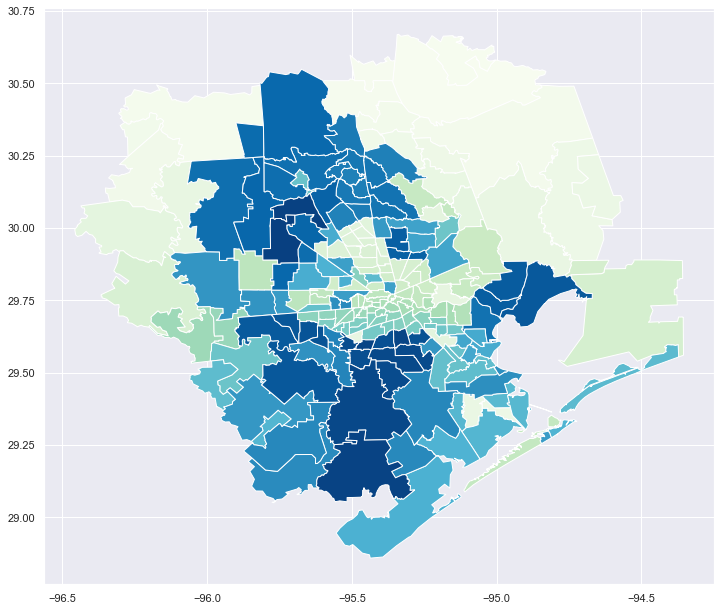

In [28]:
#Shape File is the base plot
base = HoustonZipData.plot(cmap = 'GnBu', figsize = (12,12))
#Below is my defined regions being plotted on the base plot
shape_Montgomery.plot(ax = base, color ='navajowhite')
shape_Grimes.plot(ax = base, color ='palegreen')
shape_Waller.plot(ax = base, color ='powderblue')
shape_Liberty.plot(ax = base, color ='thistle')
shape_Inner_Loop.plot(ax = base, color ='lightcoral')
shape_Baytown.plot(ax = base, color ='cornflowerblue')
shape_Chambers.plot(ax = base, color ='orchid')
shape_Outer_Upper_Loop.plot(ax = base, color ='firebrick')
shape_Galveston.plot(ax = base, color ='skyblue')
shape_Brazoria.plot(ax = base, color ='slategrey')
shape_Fort_Bend.plot(ax = base, color ='sandybrown')
shape_Other.plot(ax = base, color ='darkred')
shape_Outer_Lower_Loop.plot(ax = base, color = 'orangered')
shape_San_Jacinto.plot(ax = base, color = 'khaki')
shape_Washington.plot(ax = base, color = 'lightsalmon')

In [29]:
# Change zip code data type to string
HoustonZipData['geometry'] = HoustonZipData['geometry'].astype(str)
#I am formally adding each region to my data frame
conditions = [
#     JfModifiedDf['Zip Code'].isin(Int_Loop),
    JfModifiedDf['Zip Code'].isin(Int_Montgomery),
    JfModifiedDf['Zip Code'].isin(Int_Grimes),
    JfModifiedDf['Zip Code'].isin(Int_Waller),
    JfModifiedDf['Zip Code'].isin(Int_Liberty),
    JfModifiedDf['Zip Code'].isin(Int_Inner_Loop),
    JfModifiedDf['Zip Code'].isin(Int_Baytown),
    JfModifiedDf['Zip Code'].isin(Int_Chambers),
    JfModifiedDf['Zip Code'].isin(Int_Outer_Upper_Loop),
    JfModifiedDf['Zip Code'].isin(Int_Galveston),
    JfModifiedDf['Zip Code'].isin(Int_Brazoria),
    JfModifiedDf['Zip Code'].isin(Int_Fort_Bend),
    JfModifiedDf['Zip Code'].isin(Int_Wharton),
    JfModifiedDf['Zip Code'].isin(Int_Other),
    JfModifiedDf['Zip Code'].isin(Int_Outer_Lower_Loop),
    JfModifiedDf['Zip Code'].isin(Int_San_Jacinto),
    JfModifiedDf['Zip Code'].isin(Int_Washington),
    JfModifiedDf['Zip Code'].isin(Int_Brazos),
    JfModifiedDf['Zip Code'].isin(Int_Robertson),
    JfModifiedDf['Zip Code'].isin(Int_Austin),
    JfModifiedDf['Zip Code'].isin(Int_Colorado),
]

values = ['Montgomery', 'Grimes', 'Waller', 'Liberty', 'Inner Loop', 'Baytown', 'Chambers', 
'Outer Upper Loop', 'Galveston', 'Brazoria', 'Fort Bend', 'Wharton', 'Other', 'Outer Lower Loop', 'San Jacinto',
        'Washington', 'Brazos', 'Robertson', 'Austin', 'Colorado' ]
JfModifiedDf['Region'] = np.select(conditions, values)

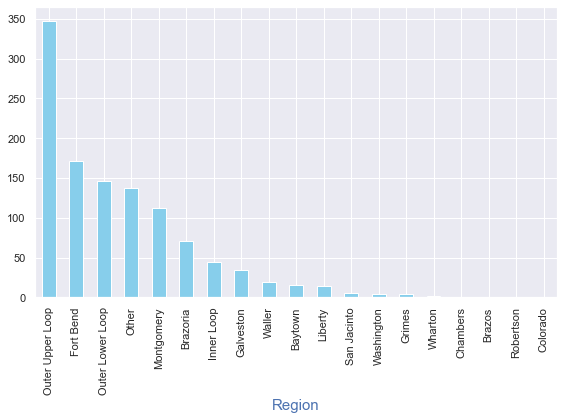

In [30]:
#Form submissions total plot
a = JfModifiedDf['Region'].value_counts()
a.plot(kind='bar', color = 'skyblue', figsize = (8,6))
plt.xlabel('Region', fontsize=15, color='b')
plt.tight_layout()

<AxesSubplot:title={'center':'Sales Total By Time Difference'}, xlabel='Days', ylabel='Sales Total'>

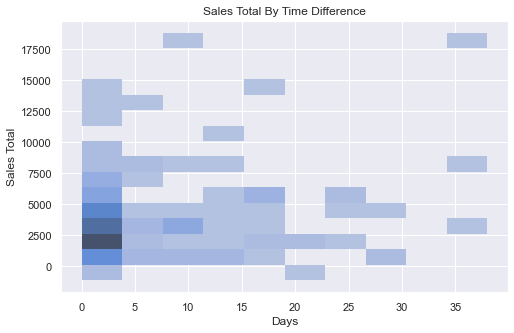

In [31]:
#sales total time difference plot
plt.figure(figsize = (8,5))
plt.title("Sales Total By Time Difference")
plt.xlabel('Days')
sns.histplot(y = 'Sales Total', x = 'diff in days', data = JsPurchase)

In [32]:
JsPurchase= JfModifiedDf.loc[JfModifiedDf["Sales Total"]!=0]

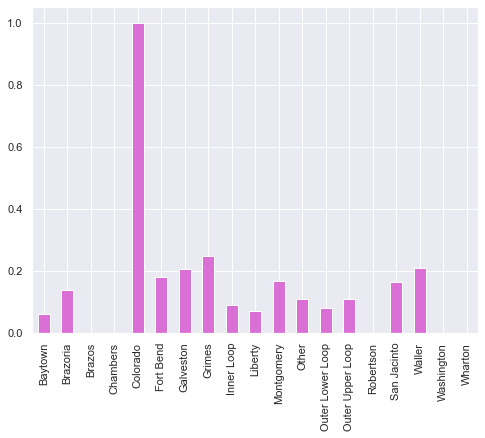

In [33]:
#HFTH Conversion ratio plot
a = JsPurchase['Region'].value_counts()/JfModifiedDf['Region'].value_counts()
a.plot(kind='bar', color = 'orchid', figsize = (8,6))
sns.set(font_scale = 2)

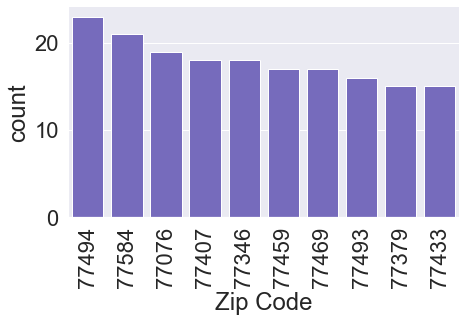

In [34]:
# Code for top voucher submissions for zip codes
g = sns.catplot(data = JfModifiedDf, x = 'Zip Code', saturation = .7, kind = 'count', 
order = [77494, 77584, 77076, 77407, 77346, 77459, 77469, 77493, 77379, 77433], ci = None, aspect = 1.4,
           color = 'slateblue')
g.set_xticklabels(rotation = 90)
sns.set_style('white')
sns.set_palette('rocket')
plt.tight_layout()

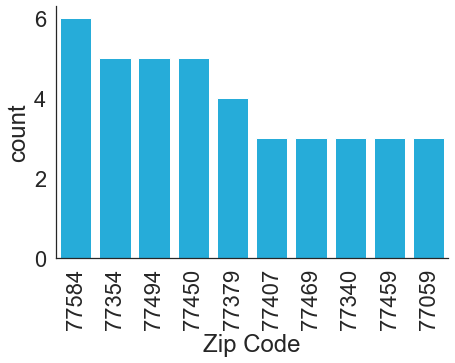

In [35]:
# Code for top voucher submissions for zip codes but for paying customers
g = sns.catplot(data = JsPurchase, x = 'Zip Code', saturation = .7, kind = 'count', 
order = [77584, 77354,77494,77450,77379,77407,77469,77340,77459,77059], ci = None, aspect = 1.4,
           color = 'deepskyblue')
plt.tight_layout()
g.set_xticklabels(rotation = 90)
sns.set_style('white')
sns.set_palette('rocket')

<AxesSubplot:>

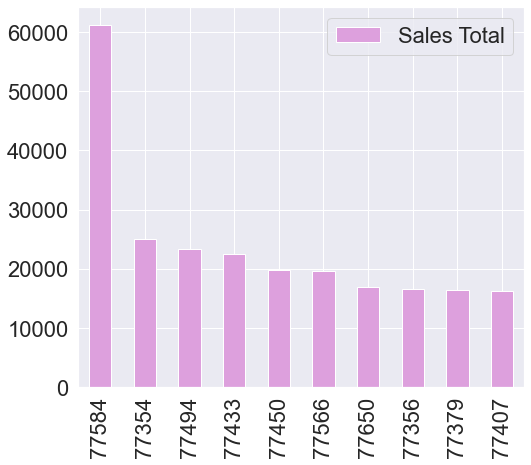

In [36]:
#Graph top 10 zip codes in descending order
plotdata = pd.DataFrame(
    {"Sales Total": [61265, 25022, 23327, 22516, 19811, 19630, 16848, 16583, 16343, 16202]}, 
    index=["77584", "77354", "77494", "77433", "77450", '77566', '77650', '77356', '77379', '77407'])

# Plot a bar chart
sns.set(font_scale = 2)
plotdata.plot(kind="bar", color='plum', rot=90)

## Quby's Geo data Analysis

In [37]:
ModifiedDf['StateName']=""
ModifiedDf['Place']=""
ModifiedDf['County']=""
ModifiedDf['Latitude']=""
ModifiedDf['Lontitude']=""
ModifiedDf['median_home_value']=""
ModifiedDf['Median_household_Income']=""  



In [38]:
Search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)   

for i in ModifiedDf.index:
        
    try:
        zipcode = Search.by_zipcode( ModifiedDf['Zip Code'][i])
#         print(zipcode.zipcode,zipcode.major_city, zipcode.county, zipcode.state, zipcode.lat,zipcode.lng,
#               zipcode.median_household_income,zipcode.median_home_value)
        ModifiedDf.loc[i,'StateName'] = zipcode.state
        ModifiedDf.loc[i,'Place'] = zipcode.major_city
        ModifiedDf.loc[i,'County'] = zipcode.county
        ModifiedDf.loc[i,'Latitude']= zipcode.lat
        ModifiedDf.loc[i,'Lontitude'] = zipcode.lng
        ModifiedDf.loc[i,'median_home_value']=zipcode.median_home_value
        ModifiedDf.loc[i,'Median_household_Income']=zipcode.median_household_income

    except:
#       catches exception for the case where no value is returned
        ModifiedDf.loc[i,'StateName'] = 0
        ModifiedDf.loc[i,'Place'] =0
        ModifiedDf.loc[i,'County'] =0  
        ModifiedDf.loc[i,'Latitude'] = 0
        ModifiedDf.loc[i,'Lontitude'] = 0
        ModifiedDf.loc[i,'median_home_value']=0
        ModifiedDf.loc[i,'Median_household_Income']=0

In [39]:
ModifiedDf.sort_values(by='Sales Total')

,index,Submission Date,Zip Code,utm_source,utm_campaign,LeadID,Sales Order Date,Sales Total,StateName,Place,County,Latitude,Lontitude,median_home_value,Median_household_Income
846,846,12/3/2021 17:05,77373,website,homefortheholidays,120,12/4/2021,-1140.93,TX,Spring,Harris County,30.06,-95.38,110900,67742
800,800,12/27/2021 18:18,77450,website,homefortheholidays,738,12/27/2021,-323.67,TX,Katy,Harris County,29.75,-95.74,191900,100957
160,160,11/30/2021 15:07,77566,sms,homefortheholidays,1096,12/20/2021,-270.61,TX,Lake Jackson,Brazoria County,29.04,-95.44,151300,75066
741,741,12/23/2021 10:48,77504,website,homefortheholidays,945,0,0.00,TX,Pasadena,Harris County,29.65,-95.19,117700,40321
740,740,12/23/2021 10:38,77494,website,homefortheholidays,85,0,0.00,TX,Katy,Fort Bend County,29.74,-95.83,262100,126425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,54,11/30/2021 11:40,77433,sms,homefortheholidays,429,12/4/2021,13422.94,TX,Cypress,Harris County,29.96,-95.69,173100,89258
101,101,11/30/2021 12:10,77650,sms,homefortheholidays,204,12/17/2021,14007.48,TX,Port Bolivar,Galveston County,29.48,-94.57,180400,79000
754,754,12/23/2021 19:30,77407,website,homefortheholidays,53,12/26/2021,14395.07,TX,Richmond,Fort Bend County,29.68,-95.7,165800,85219
1077,1077,12/9/2021 11:31,77584,email,homefortheholidays,65,12/21/2021,18560.49,TX,Pearland,Brazoria County,29.55,-95.35,189600,94103


# Distance in each who submit the coupon in Gallery Furniture  by Quby
The haversine formula determines the great-circle distance 
between two points on a sphere given their longitudes and latitudes

In [40]:
# Drop the rows that doesnt have latitude and lontitude
CordinatesZero=ModifiedDf[(ModifiedDf['Latitude']==0)&(ModifiedDf['Lontitude']==0 )].index
ModifiedDf.drop(CordinatesZero,inplace=True)


In [41]:
# Calculate distance using the Haversine Formula
# handy function 
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2-lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)


In [42]:
# Gallery Furniture is the original cordinates
start_lat, start_lon = 29.824970, -95.766150

In [43]:
#  storing distances in a list temporarily:
distances_km = []
for row in ModifiedDf.itertuples(index=False):
    distances_km.append(haversine_distance(start_lat, start_lon, row.Latitude, row.Lontitude))

In [44]:
ModifiedDf['Distance_to_GF'] = distances_km

In [45]:
LessTwoHLocation= ModifiedDf.loc[ModifiedDf['Distance_to_GF']<150]

In [46]:
LessTwoHLocation

,index,Submission Date,Zip Code,utm_source,utm_campaign,LeadID,Sales Order Date,Sales Total,StateName,Place,County,Latitude,Lontitude,median_home_value,Median_household_Income,Distance_to_GF
0,0,1/1/2022 10:50,77302,website,homefortheholidays,51,0,0.00,TX,Conroe,Montgomery County,30.22,-95.34,113100,57758,60.11
1,1,1/1/2022 12:16,77484,website,homefortheholidays,928,0,0.00,TX,Waller,Waller County,30.05,-95.92,132500,63045,29.08
2,2,1/1/2022 13:58,77433,website,homefortheholidays,643,0,0.00,TX,Cypress,Harris County,29.96,-95.69,173100,89258,16.71
3,3,1/1/2022 17:46,77035,website,homefortheholidays,794,0,0.00,TX,Houston,Harris County,29.65,-95.48,156300,36345,33.79
4,4,1/1/2022 18:33,77498,website,homefortheholidays,707,0,0.00,TX,Sugar Land,Fort Bend County,29.63,-95.65,159100,72232,24.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,1128,12/9/2021 21:53,77357,website,homefortheholidays,1041,0,0.00,TX,New Caney,Montgomery County,30.15,-95.18,101000,48979,67.03
1129,1129,12/9/2021 22:12,77573,website,homefortheholidays,968,1/7/2022,4329.99,TX,League City,Galveston County,29.48,-95.1,182300,92559,74.93
1130,1130,12/9/2021 23:22,77316,website,homefortheholidays,668,0,0.00,TX,Montgomery,Montgomery County,30.31,-95.69,165000,72458,54.43
1131,1131,12/9/2021 8:04,77406,website,homefortheholidays,417,0,0.00,TX,Richmond,Fort Bend County,29.65,-95.79,215700,110294,19.59


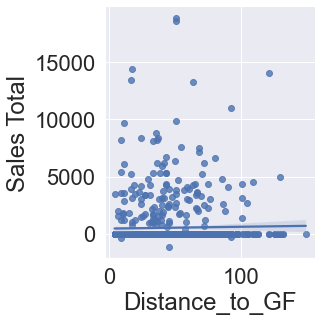

In [47]:

sns.lmplot(x="Distance_to_GF", y="Sales Total", data=LessTwoHLocation, palette=dict(Yes="g", No="m"))
plt.show()

In [48]:
ModifiedDfSortedvalue=ModifiedDf.sort_values('Sales Total')

In [49]:
ModifiedDfSortedvalue['County'].value_counts()

Harris County        590
Fort Bend County     147
Montgomery County    108
Brazoria County       70
Galveston County      36
                    ... 
Lyon County            1
Riverside County       1
Cotton County          1
Hays County            1
Leon County            1
Name: County, Length: 83, dtype: int64

In [50]:
Purchased=ModifiedDf.loc[ModifiedDfSortedvalue['Sales Total']!=0]
NonPurchased =ModifiedDf.loc[ModifiedDfSortedvalue['Sales Total']==0]
Area_list=list(ModifiedDfSortedvalue['StateName'].unique())
PurchasedArea_list = list(Purchased['StateName'].unique())
NONPurchasedArea_list = list(NonPurchased['StateName'].unique())

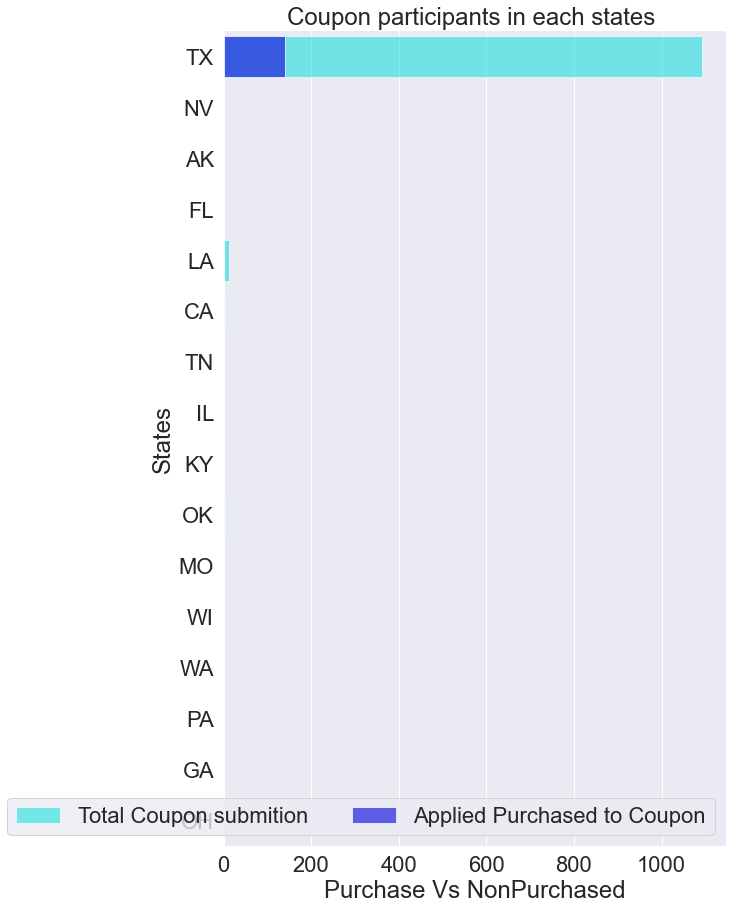

In [51]:
totalCount=[]
PurchasedCount=[]
for i in Area_list:
    x=ModifiedDfSortedvalue[ModifiedDfSortedvalue['StateName']==i]
    y=Purchased[Purchased['StateName']==i]
    totalCount.append(sum(x['StateName']==i))
    PurchasedCount.append(sum(y['StateName']==i))
#     print(i,totalCount,PurchasedCount)
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=totalCount,y=Area_list,color='cyan',alpha = 0.6,label='Total Coupon submition')
sns.barplot(x=PurchasedCount,y=Area_list,color='blue',alpha = 0.7,label='Applied Purchased to Coupon')

ax.set(xlabel='Purchase Vs NonPurchased', ylabel='States',title = "Coupon participants in each states ")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


In [52]:
TexasRegion =ModifiedDfSortedvalue.loc[ModifiedDfSortedvalue['StateName']=='TX'].sort_values('Sales Total')
PlaceList = list(TexasRegion['County'].unique())

TexasRegionPurchasedRegions=list(Purchased['County'].unique())
TexasRegionNONPurchasedRegions= list(NonPurchased['County'].unique())


In [53]:
PurchaseTexas=[]
NonPruchasedTexas=[]
for i in PlaceList:
    x=TexasRegion[TexasRegion['County']==i]
    y=Purchased[Purchased['County']==i]
    NonPruchasedTexas.append(sum(x['County']==i))
    PurchaseTexas.append(sum(y['County']==i))

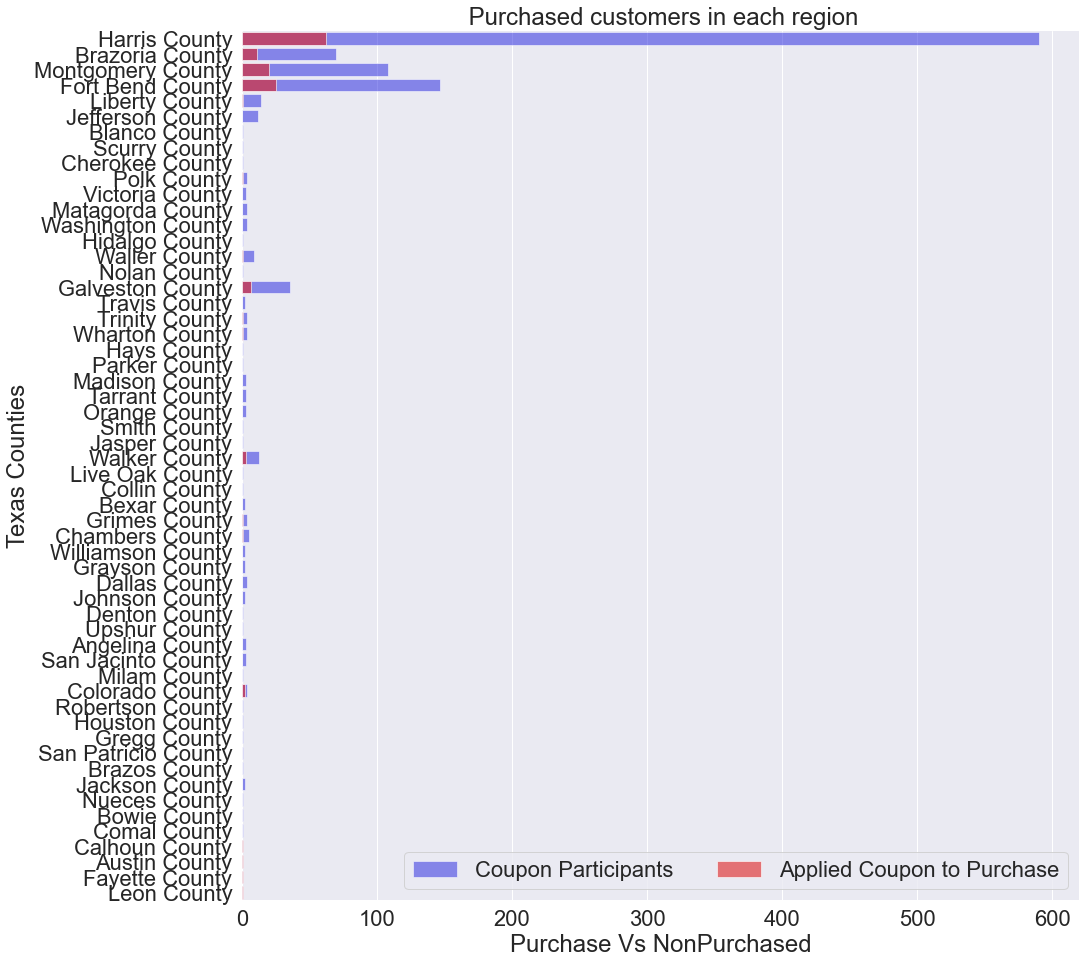

In [54]:

# visualization
f,ax = plt.subplots(figsize = (15,16))
sns.barplot(x=NonPruchasedTexas,y=PlaceList, color='blue',alpha = 0.5,label='Coupon Participants')
sns.barplot(x=PurchaseTexas, y=PlaceList, color='red',alpha = 0.6,label='Applied Coupon to Purchase')


ax.set(xlabel='Purchase Vs NonPurchased', ylabel='Texas Counties',title = " Purchased customers in each region")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

# Using interative map by using Folium module by Quby
For the specific function and use please see below link:
https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [55]:
import folium
import math 
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [56]:
# Create the first map object or layer based on the mean of latitude and lontitude:
map1 = folium.Map(location = [np.mean(ModifiedDf['Latitude']), np.mean(ModifiedDf['Lontitude'])], 
                  tiles = 'OpenStreetMap', zoom_start = 10)

# Adding Tiles to the base map:
folium.TileLayer('Stamen Terrain').add_to(map1)
folium.TileLayer('cartodbdark_matter').add_to(map1)
folium.TileLayer('Stamen Water Color').add_to(map1)
folium.TileLayer('Stamen Toner').add_to(map1)
folium.TileLayer('cartodbpositron').add_to(map1)

folium.LayerControl().add_to(map1)

map1

In [57]:
# Markers for the people who are involved with the coupon campaign based on their cordinates: 
for idx, row in ModifiedDf.iterrows():
    Marker([row['Latitude'], row['Lontitude']]).add_to(map1)
    
map1

In [58]:

# Create a second map object and use OpenStree Map's API
map2 = folium.Map(location = [np.mean(ModifiedDf['Latitude']), np.mean(ModifiedDf['Lontitude'])], tiles = 'OpenStreetMap', 
                  zoom_start = 8)
# The customers for the Home-For-Holiday:
mc = MarkerCluster(name = 'Home-For-Holiday Campign')

# use iterrows function to loop through each index and rows of Purchased Account
for idx, row in ModifiedDf.iterrows():
    if not math.isnan(row['Lontitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Lontitude']]))
        
map2.add_child(mc)
map2.save('Map.html')

map2

In [59]:
# Create a  map object and use OpenStree Map's APT
map3 = folium.Map(location = [np.mean(Purchased['Latitude']), np.mean(Purchased['Lontitude'])], tiles = 'OpenStreetMap', 
                  zoom_start = 8)
# The purchased customers:
mc = MarkerCluster(name = 'Purchased Accounts')

# use iterrows function to loop through each index and rows of NonPurchased Account
for idx, row in Purchased.iterrows():
    if not math.isnan(row['Lontitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Lontitude']]))
        
map3.add_child(mc)
map3.save('The Purchased Map.html')

map3

# Decision Tree Process by Quby
1. Data Preprocessing 
2. Data Training & testing
3. Tree Structrue pruning

Data Preprocessing & Data preparation- convert the feature varibales to numeric type

In [60]:
# pd.set_option("display.max_rows",None, "display.max_columns",None)
ModifiedDf.loc[ModifiedDf['Sales Total']!=0, 'Status'] =1
ModifiedDf.loc[ModifiedDf['Sales Total']==0, 'Status'] =0

In [61]:
ModifiedDf['Status'].value_counts(normalize=True)

0.0    0.872114
1.0    0.127886
Name: Status, dtype: float64

In [62]:
ModifiedDf.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1126.0,566.797513,326.950266,0.00,284.25,567.5,849.75,1132.00
Zip Code,1126.0,77048.424512,3745.853953,18641.00,77073.00,77375.0,77493.00,99737.00
LeadID,1126.0,565.821492,326.944466,0.00,283.25,565.5,848.75,1132.00
Sales Total,1126.0,510.430835,1801.387944,-1140.93,0.00,0.0,0.00,18835.47
Distance_to_GF,1126.0,94.038153,281.169461,3.87,29.24,44.6,65.77,5090.45
Status,1126.0,0.127886,0.334112,0.00,0.00,0.0,0.00,1.00


In [63]:
ModifiedDf['Latitude']= ModifiedDf['Latitude'].astype(float)
ModifiedDf['Lontitude'] =ModifiedDf['Lontitude'].astype(float)
ModifiedDf['Median_household_Income'] =ModifiedDf['Median_household_Income'].astype(float)
ModifiedDf['median_home_value'] =ModifiedDf['median_home_value'].astype(float)
ModifiedDf['Status'] =ModifiedDf['Status'].astype(int)


In [64]:
ModifiedDf.dtypes

index                        int64
Submission Date             object
Zip Code                     int64
utm_source                  object
utm_campaign                object
LeadID                       int64
Sales Order Date            object
Sales Total                float64
StateName                   object
Place                       object
County                      object
Latitude                   float64
Lontitude                  float64
median_home_value          float64
Median_household_Income    float64
Distance_to_GF             float64
Status                       int32
dtype: object

In [65]:
print(ModifiedDf.isnull().sum())

index                      0
Submission Date            0
Zip Code                   0
utm_source                 0
utm_campaign               0
LeadID                     0
Sales Order Date           0
Sales Total                0
StateName                  0
Place                      0
County                     0
Latitude                   0
Lontitude                  0
median_home_value          8
Median_household_Income    8
Distance_to_GF             0
Status                     0
dtype: int64


In [66]:
#Figure out the rest of 8 null value is in TX and filled in median household income from TX from 2020 : $63,826
ModifiedDf['Median_household_Income'].fillna(63826, inplace = True)
ModifiedDf['median_home_value'].fillna(238939, inplace = True)

In [67]:
ModifiedDf['Median_household_Income'].mean()

64929.65808170515

In [68]:
ModifiedDf['median_home_value'].mean()

152657.91474245116

In [69]:
print(ModifiedDf.isnull().sum())


index                      0
Submission Date            0
Zip Code                   0
utm_source                 0
utm_campaign               0
LeadID                     0
Sales Order Date           0
Sales Total                0
StateName                  0
Place                      0
County                     0
Latitude                   0
Lontitude                  0
median_home_value          0
Median_household_Income    0
Distance_to_GF             0
Status                     0
dtype: int64


In [70]:
ModifiedDf.shape

(1126, 17)

In [71]:
ModifiedDf['Place'].value_counts(normalize=True)

Houston        0.317052
Katy           0.056838
Spring         0.050622
Richmond       0.038188
Humble         0.031083
                 ...   
Corrigan       0.000888
New Waverly    0.000888
Pinehurst      0.000888
Euclid         0.000888
Meyersville    0.000888
Name: Place, Length: 171, dtype: float64

In [72]:
print(ModifiedDf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1132
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    1126 non-null   int64  
 1   Submission Date          1126 non-null   object 
 2   Zip Code                 1126 non-null   int64  
 3   utm_source               1126 non-null   object 
 4   utm_campaign             1126 non-null   object 
 5   LeadID                   1126 non-null   int64  
 6   Sales Order Date         1126 non-null   object 
 7   Sales Total              1126 non-null   float64
 8   StateName                1126 non-null   object 
 9   Place                    1126 non-null   object 
 10  County                   1126 non-null   object 
 11  Latitude                 1126 non-null   float64
 12  Lontitude                1126 non-null   float64
 13  median_home_value        1126 non-null   float64
 14  Median_household_Income 

Status' is the target column/variable.
LeadID', 'Index' aand 'utm_campaign' doesn't contribute to the target variable 'purchased'. So, we can remove it from the data.

In [73]:
DemodifiedDf = ModifiedDf.drop(['Zip Code','Sales Total','index','Place','County','Submission Date','LeadID','Sales Order Date','utm_campaign','StateName'],axis = 1)

In [74]:
DemodifiedDf

,utm_source,Latitude,Lontitude,median_home_value,Median_household_Income,Distance_to_GF,Status
0,website,30.22,-95.34,113100.0,57758.0,60.11,0
1,website,30.05,-95.92,132500.0,63045.0,29.08,0
2,website,29.96,-95.69,173100.0,89258.0,16.71,0
3,website,29.65,-95.48,156300.0,36345.0,33.79,0
4,website,29.63,-95.65,159100.0,72232.0,24.41,0
...,...,...,...,...,...,...,...
1128,website,30.15,-95.18,101000.0,48979.0,67.03,0
1129,website,29.48,-95.10,182300.0,92559.0,74.93,1
1130,website,30.31,-95.69,165000.0,72458.0,54.43,0
1131,website,29.65,-95.79,215700.0,110294.0,19.59,0


In [75]:
DemodifiedDf['utm_source'].unique()

array(['website', 'sms', 'email', 'facebook', 'google', 'instagram',
       'twitter', 'mm_facebook'], dtype=object)

In [76]:
DemodifiedDf['utm_source'] = DemodifiedDf['utm_source'].replace('mm_facebook', 'facebook')


In [77]:
channel_mapping = {"website": 1, "email": 2, "sms": 3, "facebook": 4, "instagram": 5,"twitter":6,"google":7}
DemodifiedDf['utm_source'] =DemodifiedDf['utm_source'].map(channel_mapping)
DemodifiedDf['utm_source'] =DemodifiedDf['utm_source'].fillna(0)

In [78]:
#  Mapping distance from Gallery Furniture
DemodifiedDf.loc[ DemodifiedDf['Distance_to_GF'] <= 10, 'Distance_to_GF']= 0
DemodifiedDf.loc[(DemodifiedDf['Distance_to_GF'] > 10) & (DemodifiedDf['Distance_to_GF'] <= 20), 'Distance_to_GF'] = 1
DemodifiedDf.loc[(DemodifiedDf['Distance_to_GF'] > 20) & (DemodifiedDf['Distance_to_GF'] <= 50), 'Distance_to_GF'] = 2
DemodifiedDf.loc[(DemodifiedDf['Distance_to_GF'] > 50) & (DemodifiedDf['Distance_to_GF'] <= 80), 'Distance_to_GF'] = 3
DemodifiedDf.loc[(DemodifiedDf['Distance_to_GF'] > 80) & (DemodifiedDf['Distance_to_GF'] <= 100), 'Distance_to_GF'] =4
DemodifiedDf.loc[(DemodifiedDf['Distance_to_GF'] > 100) & (DemodifiedDf['Distance_to_GF'] <= 150), 'Distance_to_GF'] =5 
DemodifiedDf.loc[(DemodifiedDf['Distance_to_GF'] > 150) & (DemodifiedDf['Distance_to_GF'] <= 200), 'Distance_to_GF'] =6
DemodifiedDf.loc[DemodifiedDf['Distance_to_GF'] > 200, 'Distance_to_GF'] =7

In [79]:
DemodifiedDf

,utm_source,Latitude,Lontitude,median_home_value,Median_household_Income,Distance_to_GF,Status
0,1,30.22,-95.34,113100.0,57758.0,3.0,0
1,1,30.05,-95.92,132500.0,63045.0,2.0,0
2,1,29.96,-95.69,173100.0,89258.0,1.0,0
3,1,29.65,-95.48,156300.0,36345.0,2.0,0
4,1,29.63,-95.65,159100.0,72232.0,2.0,0
...,...,...,...,...,...,...,...
1128,1,30.15,-95.18,101000.0,48979.0,3.0,0
1129,1,29.48,-95.10,182300.0,92559.0,3.0,1
1130,1,30.31,-95.69,165000.0,72458.0,3.0,0
1131,1,29.65,-95.79,215700.0,110294.0,1.0,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

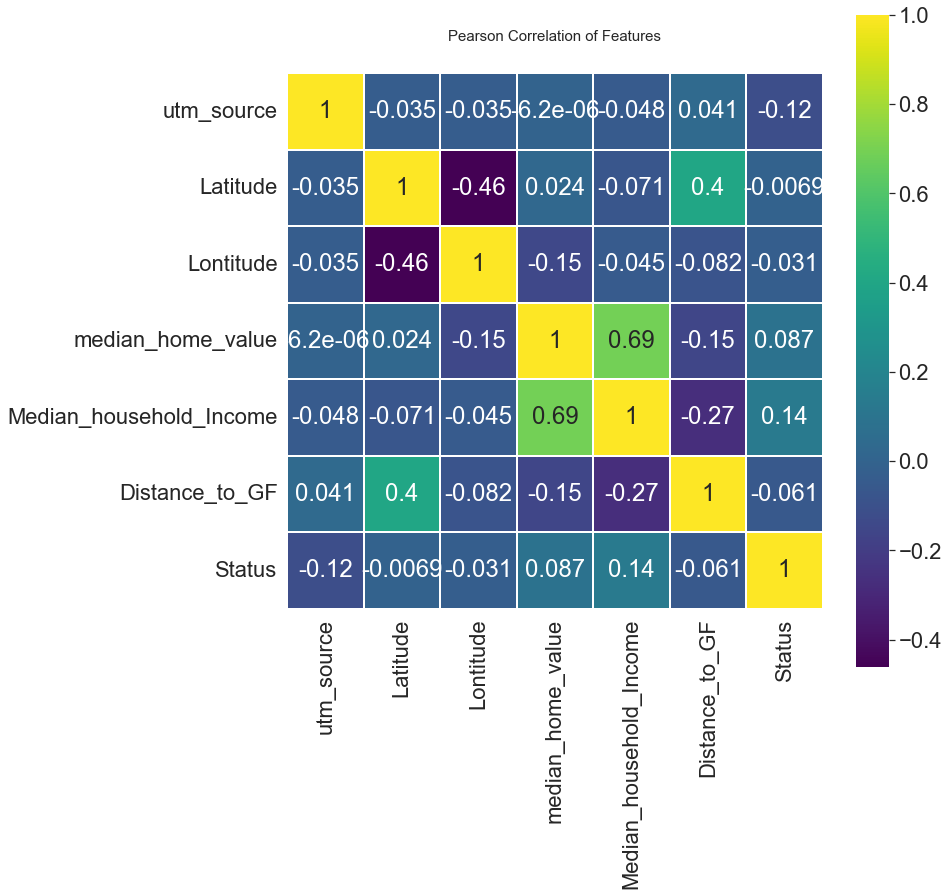

In [80]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(DemodifiedDf.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

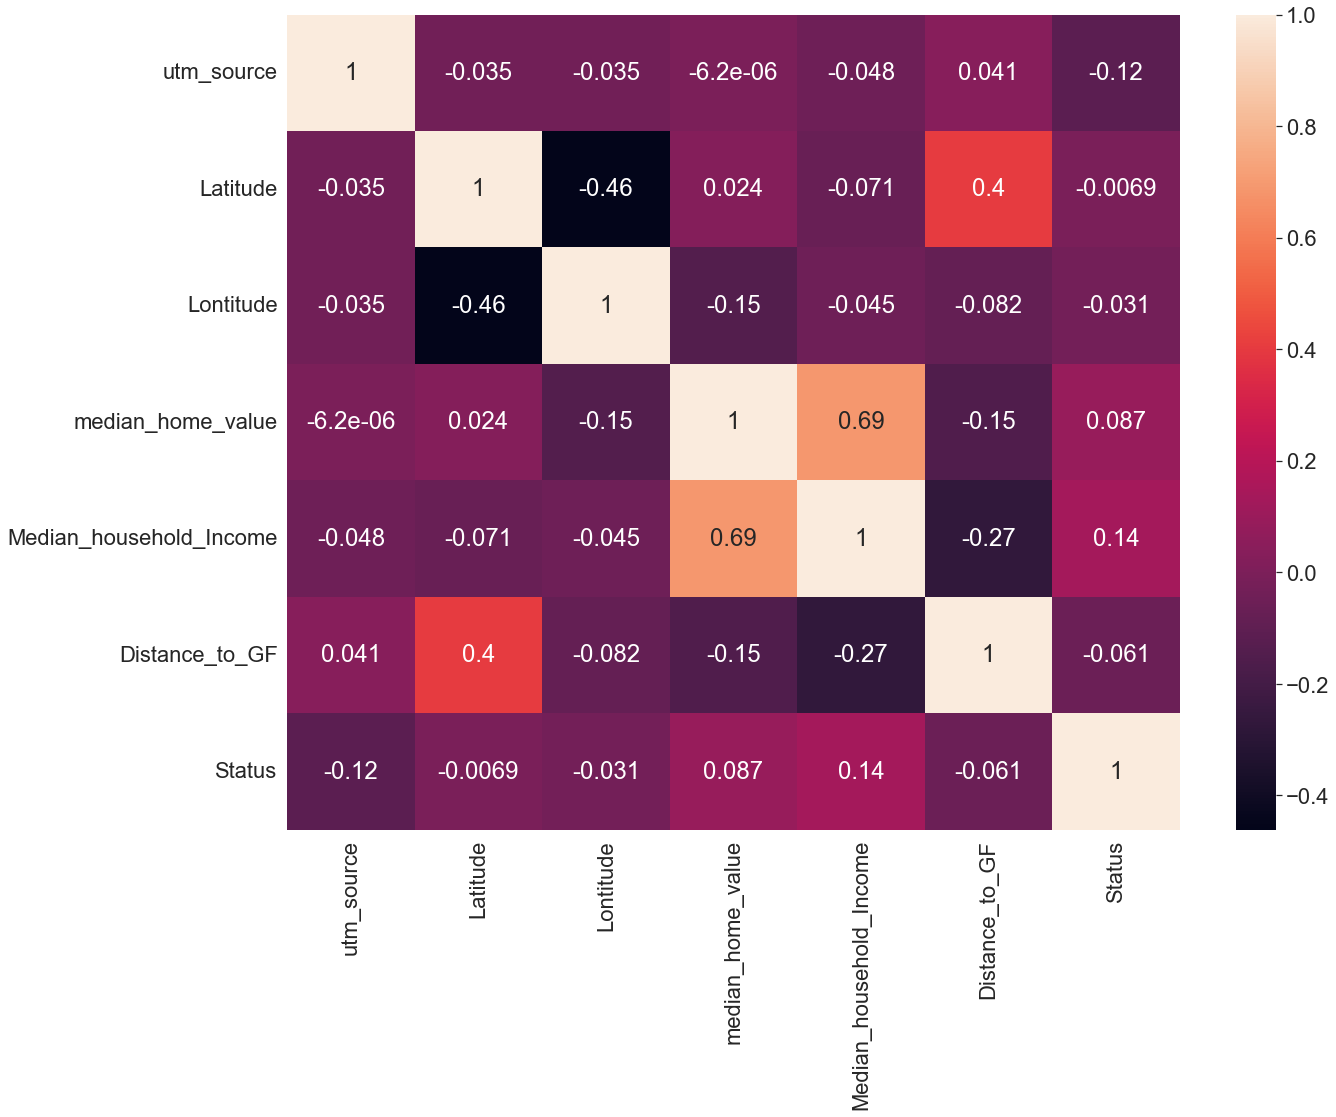

In [81]:
corr_matrix = DemodifiedDf.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [82]:
cor_target = abs(corr_matrix["Status"])
relevant_features = cor_target[cor_target>=0.1]
relevant_features

utm_source                 0.119111
Median_household_Income    0.137330
Status                     1.000000
Name: Status, dtype: float64

In [83]:
cor_target

utm_source                 0.119111
Latitude                   0.006879
Lontitude                  0.031313
median_home_value          0.087435
Median_household_Income    0.137330
Distance_to_GF             0.060869
Status                     1.000000
Name: Status, dtype: float64

# Train test split by using method SMOTE to counter overfitting in Decision Tree by Quby 

In [84]:
DemodifiedDf_dummies = pd.get_dummies(DemodifiedDf['utm_source'])

In [85]:
DemodifiedDf.Status.value_counts()



0    982
1    144
Name: Status, dtype: int64

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import statistics as stat
from sklearn.metrics import accuracy_score

#from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Modules used for assessing the performance of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Split Train data and Test data into ratio 7:3 

In [89]:
#split dataset in features and target variable
# feature_cols = ['median_home_value_class','Median_HomeIncome_class','Distance_to_GF']
X = DemodifiedDf.drop(['Status','Lontitude','Latitude','Distance_to_GF','median_home_value'],axis=1) # Features
y = DemodifiedDf.Status   # Target variable
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8550295857988166


col_0,0,1
Status,,
0,287,10
1,39,2


In [92]:
smote = SMOTE() #defining an object for SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train) 

In [93]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))
#before smoting, in training data set you had 685 data in "0" class and "1" class had 103
#and after smoting, all classes have now same number of records
#how this has happend: by creating extrapolating individual classes
#accepted had 103 numbers of data, we use these 103, 
# take avges, interpolate (by taking avg of neighbouring data and create new data till it becomes 685)

Before SMOTE : Counter({0: 685, 1: 103})
After SMOTE : Counter({0: 685, 1: 685})


In [99]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

#we see now the accuracy has gone down as compared with previous which helped us to correct the biased majority: non-Purhcashed

0.727810650887574


col_0,0,1
Status,,
0,239,58
1,34,7


In [101]:
pd.crosstab(y_predict,y_test)

Status,0,1
row_0,,
0,239,34
1,58,7


In [95]:
##Aplying model after finding best parameters
decision_tree = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
decision_tree.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

Deciosion Tree diagram using graphviz

In [96]:
##for dicision tree diagrmam
#8==========================D
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pydotplus

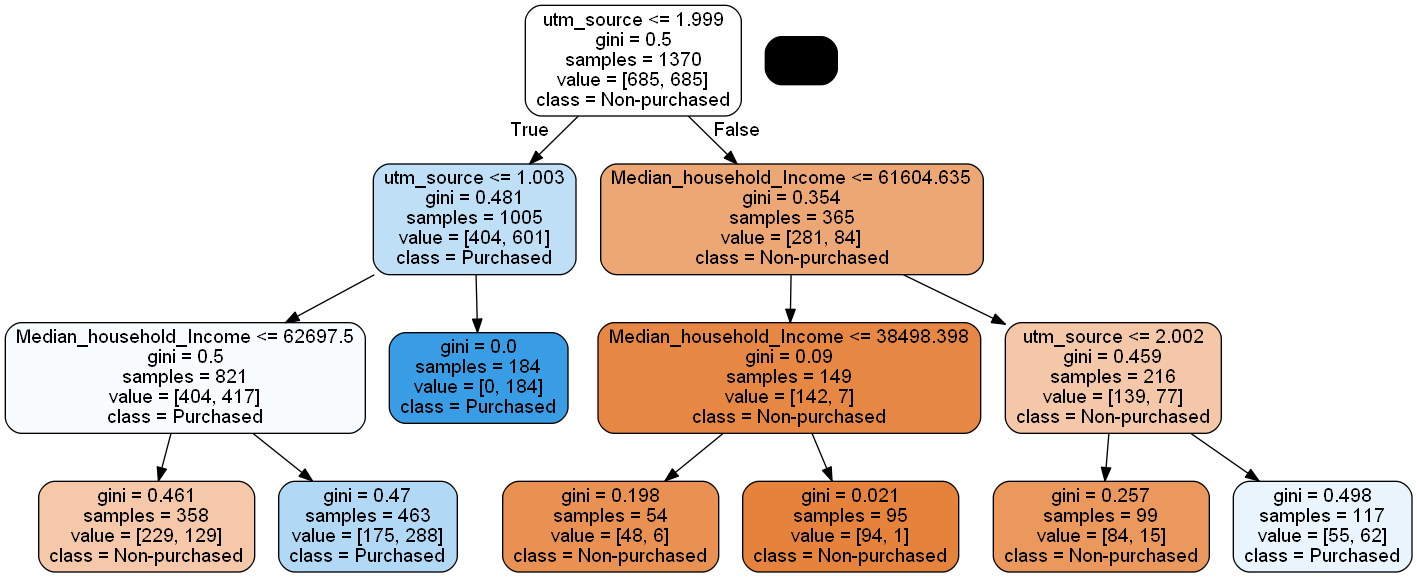

In [97]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns,
               class_names=['Non-purchased','Purchased'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())